# Simple SVM

status: optimal
optimal value 114.22404939551024
optimal var w = [[-13.85214976]
 [ -6.04698651]], b = 18.344923282928267


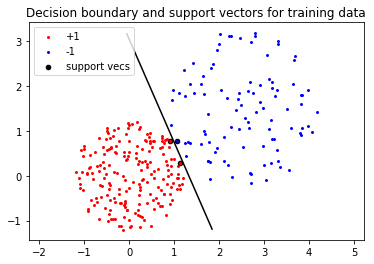

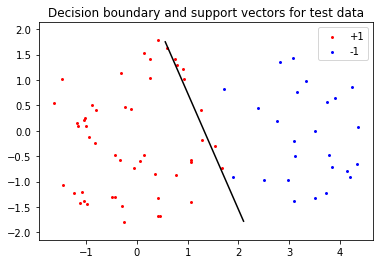

In [2]:
# ECS271 2019S
# Toy example of Linear SVM
# 4/16/2019
# To run this code, please first install cvxpy from https://www.cvxpy.org/

import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import random
import time
import cvxpy as cp


# generate toy training data 
N1 = 200 # number of positive instances
N2 = 100 # number of negative instances
D = 2 # feature dimension
eps = 1e-8 # select support vectors
random.seed(1) # For reproducibility
r1 = np.sqrt(1.5*np.random.rand(N1,1)) # Radius
t1 = 2*np.pi*np.random.rand(N1,1)  # Angle
data1 = np.concatenate((r1*np.cos(t1), r1*np.sin(t1)), axis=1) # Points
r2 = np.sqrt(3*np.random.rand(N2,1)) # Radius
t2 = 2*np.pi*np.random.rand(N2,1)      # Angle
data2 = np.concatenate((2.5+r2*np.cos(t2), 1.5+r2*np.sin(t2)), axis=1) # points
## generate toy testing data
Nt1 = 50 # number of positive instances
Nt2 = 25 # number of negative instances
D = 2 # feature dimension
random.seed(1) # For reproducibility
r1 = np.sqrt(3.4*np.random.rand(Nt1,1)) # Radius
t1 = 2*np.pi*np.random.rand(Nt1,1)  # Angle
testdata1 = np.concatenate((r1*np.cos(t1), r1*np.sin(t1)), axis=1) # Points
r2 = np.sqrt(2.4*np.random.rand(Nt2,1)) # Radius
t2 = 2*np.pi*np.random.rand(Nt2,1)      # Angle
testdata2 = np.concatenate((3+r2*np.cos(t2), r2*np.sin(t2)), axis=1) # points
## training linear SVM based on CVX optimizer
X = np.concatenate((data1, data2), axis=0)
y = np.concatenate((np.ones((N1, 1)), - np.ones((N2, 1))), axis=0)

w = cp.Variable((D, 1))
b = cp.Variable()
objective = cp.Minimize(cp.sum(cp.square(w)) * 0.5)
constraints = [cp.multiply(y, (X @ w + b)) >= 1]
prob = cp.Problem(objective, constraints)
prob.solve()
print("status:", prob.status)
print("optimal value", prob.value)
print("optimal var w = {}, b = {}".format(w.value, b.value))


## visualize decision boundary for training data
d = 0.02
x1 = np.arange(np.min(X[:,0]), np.max(X[:,0]), d)
x2 = np.arange(np.min(X[:,1]), np.max(X[:,1]), d)
x1Grid, x2Grid = np.meshgrid(x1, x2)
xGrid = np.stack((x1Grid.flatten('F'), x2Grid.flatten('F')), axis=1)
scores1 = xGrid.dot(w.value) + b.value
scores2 = -xGrid.dot(w.value) - b.value
plt.figure(0)
sup = y*(X.dot(w.value)+b.value)-1
sup_v1 = ((-eps<sup) & (sup<eps)).flatten()
h3 = plt.scatter(X[sup_v1,0], X[sup_v1,1], s=21, marker='o', c='k')
h1 = plt.scatter(data1[:,0], data1[:,1], s=15, marker='.', c='r')
h2 = plt.scatter(data2[:,0], data2[:,1], s=15, marker='.', c='b')
plt.contour(x1Grid, x2Grid, np.reshape(scores1, x1Grid.shape, order='F'), levels=0, colors='k')
plt.axis('equal')
plt.title('Decision boundary and support vectors for training data')
plt.legend((h1, h2, h3),('+1','-1', 'support vecs'))
plt.savefig('simpleSVM_train_decision_1.png')

time.sleep(2)
## visualize decision boundary for test data
Xt = np.concatenate((testdata1, testdata2), axis=0)
yt = np.concatenate((np.ones((Nt1, 1)), - np.ones((Nt2, 1))), axis=0)
xt1 = np.arange(np.min(Xt[:,0]), np.max(Xt[:,0]), d)
xt2 = np.arange(np.min(Xt[:,1]), np.max(Xt[:,1]), d)
xt1Grid, xt2Grid = np.meshgrid(xt1, xt2)
xtGrid = np.stack((xt1Grid.flatten('F'), xt2Grid.flatten('F')), axis=1)
test_scores1 = xtGrid.dot(w.value) + b.value
test_scores2 = -xtGrid.dot(w.value) - b.value
plt.figure(1)
ht1 = plt.scatter(testdata1[:,0], testdata1[:,1], s=15, marker='.', c='r')
ht2 = plt.scatter(testdata2[:,0], testdata2[:,1], s=15, marker='.', c='b')
plt.contour(xt1Grid, xt2Grid, np.reshape(test_scores1, xt1Grid.shape, order='F'), levels=0, colors='k')
plt.axis('equal')
plt.title('Decision boundary and support vectors for test data')
plt.legend((ht1, ht2),('+1','-1'))
plt.savefig('simpleSVM_test_decision_1.png')
plt.show()